In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


Lets do a recap to get to the last part of the previous lecture by:
- Getting and preparing the data.
- Splitting the data
- Create and train the model
- Calculate the accuracy

## Getting & preparing the data

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [6]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.churn = (df.churn == 'yes').astype(int)

## Splitting the data

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['churn']
del df_val['churn']
del df_test['churn']

## Create and train the model. Calculate Accuracy

In [10]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [11]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
val_dict = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]
churn_desicion = (y_pred >= 0.5)
(y_val == churn_desicion).mean()

0.8034066713981547

## Accuracy and Dumb model

- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

So far our accuray is around 80%. One of the factors we decided as part of the model was the churn desicion to be in 0.5. If y_pred values were >= 0.5 we assumed churn and if not, then no churn. What happens if we tried different threshold values?

In [13]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [14]:
scores = []

for t in thresholds:
    churn_desicion = (y_pred >= t)
    score = (y_val == churn_desicion).mean()
    print('Thresshold: %.2f, Score: %.3f' % (t, score))
    scores.append(score)


Thresshold: 0.00, Score: 0.274
Thresshold: 0.05, Score: 0.509
Thresshold: 0.10, Score: 0.591
Thresshold: 0.15, Score: 0.666
Thresshold: 0.20, Score: 0.710
Thresshold: 0.25, Score: 0.739
Thresshold: 0.30, Score: 0.760
Thresshold: 0.35, Score: 0.772
Thresshold: 0.40, Score: 0.785
Thresshold: 0.45, Score: 0.793
Thresshold: 0.50, Score: 0.803
Thresshold: 0.55, Score: 0.801
Thresshold: 0.60, Score: 0.795
Thresshold: 0.65, Score: 0.786
Thresshold: 0.70, Score: 0.766
Thresshold: 0.75, Score: 0.744
Thresshold: 0.80, Score: 0.735
Thresshold: 0.85, Score: 0.726
Thresshold: 0.90, Score: 0.726
Thresshold: 0.95, Score: 0.726
Thresshold: 1.00, Score: 0.726


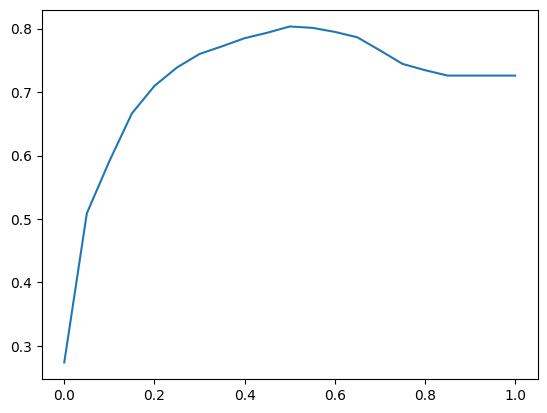

In [15]:
plt.plot(thresholds, scores)

Scikit Learn also have a library to calculate accuracy

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('Thresshold: %.2f, Score: %.3f' % (t, score))
    scores.append(score)

Thresshold: 0.00, Score: 0.274
Thresshold: 0.05, Score: 0.509
Thresshold: 0.10, Score: 0.591
Thresshold: 0.15, Score: 0.666
Thresshold: 0.20, Score: 0.710
Thresshold: 0.25, Score: 0.739
Thresshold: 0.30, Score: 0.760
Thresshold: 0.35, Score: 0.772
Thresshold: 0.40, Score: 0.785
Thresshold: 0.45, Score: 0.793
Thresshold: 0.50, Score: 0.803
Thresshold: 0.55, Score: 0.801
Thresshold: 0.60, Score: 0.795
Thresshold: 0.65, Score: 0.786
Thresshold: 0.70, Score: 0.766
Thresshold: 0.75, Score: 0.744
Thresshold: 0.80, Score: 0.735
Thresshold: 0.85, Score: 0.726
Thresshold: 0.90, Score: 0.726
Thresshold: 0.95, Score: 0.726
Thresshold: 1.00, Score: 0.726


If we take a look at the score values, from threshold 0.85 there is no increase nor decrease in the score. Lets check how may y_pred has a value >=1 for example

In [18]:
from collections import Counter

In [19]:
Counter(y_pred >= 0.85), Counter(y_pred >= 1.0) 

(Counter({False: 1409}), Counter({False: 1409}))

Based on this we could see at two models
- Our original model which as an accuracy of 80%
- A Dummy model which has an accuracy of 73%

But how a model can get such a decent accuracy if onder the condition of churn decision >= 1 no positive churning is actually detected?

The reason has to be with the actual distribution of values, lets see how is the relation between churn and no churn in our validation target

In [20]:
Counter(y_val)

Counter({0: 1023, 1: 386})

There are more values associated with no-churn than churn. This is what is normally called **Class Inbalance**

In these cases, the accuracy is quite misleading

## Confusion table

- Different types of errors and correct decisions
- Arranging them in a table

In [27]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
actual_positive, actual_negative

(array([False, False, False, ..., False,  True,  True]),
 array([ True,  True,  True, ...,  True, False, False]))

In [26]:
t = 0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)
pred_positive, pred_negative

(array([False, False, False, ..., False,  True,  True]),
 array([ True,  True,  True, ...,  True, False, False]))

To actually intercept actual values and predictions we use the & (and) operator

In [28]:
# True Positive - tp
tp = (actual_positive & pred_positive).sum()

# True Negative - tn
tn = (actual_negative & pred_negative).sum()

# False Positive
fp = (actual_negative & pred_positive).sum()

# False Negative
fn = (actual_positive & pred_negative).sum()
tp, tn, fp, fn

(210, 922, 101, 176)

With these values, instead of just calculating the global accuracy of the model, we can arrange these values in a table to understand how good the model is


|   |Negative Prediction|Positive Prediction|
|---|:---:|:---:|
| Actual Negative | True Negative | False Positive |
| Actual Positive | False Negative | True Positive |

In [32]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [30]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.12, 0.15],
       [0.65, 0.07]])

If we sum the tp and the tn we get the original 80% accuracy. The idea of doing this is that you know with more detail how the false positive or negative could affect the business side.

## Precision and Recall

**Precision** => Fraction of Positive Predictions that are correct

We care only on True Positive and False Positive for Precision Analysis

In [34]:
(tp + tn) / (tp + fp + tn + fn)

0.8034066713981547

In [36]:
p = tp / (tp + fp)
p

0.6752411575562701

This would mean that there is a 33% of users that our model predicted they would churn, that are going to receive a promotional email as a mistake

**Recall** => Fraction of correctly identifed positive examples

The difference with Accuracy is that we calculate the ratio among the true positive and the false negative. In this example it would mean the users we predidcted as no-churn but that actually churned

In [37]:
r = tp / (tp + fn)
r

0.5440414507772021

At a business level it means that we miss to identify 46% of clients that actually churned

## ROC CURVES

ROC stands for Receiver Operating Characteristics and it is used to describe the performance of binary classification models

For ROC Curves we work with two indicators:

- TPR => TRUE POSITIVE RATE
- FPR => FALSE POSITIVE RATE

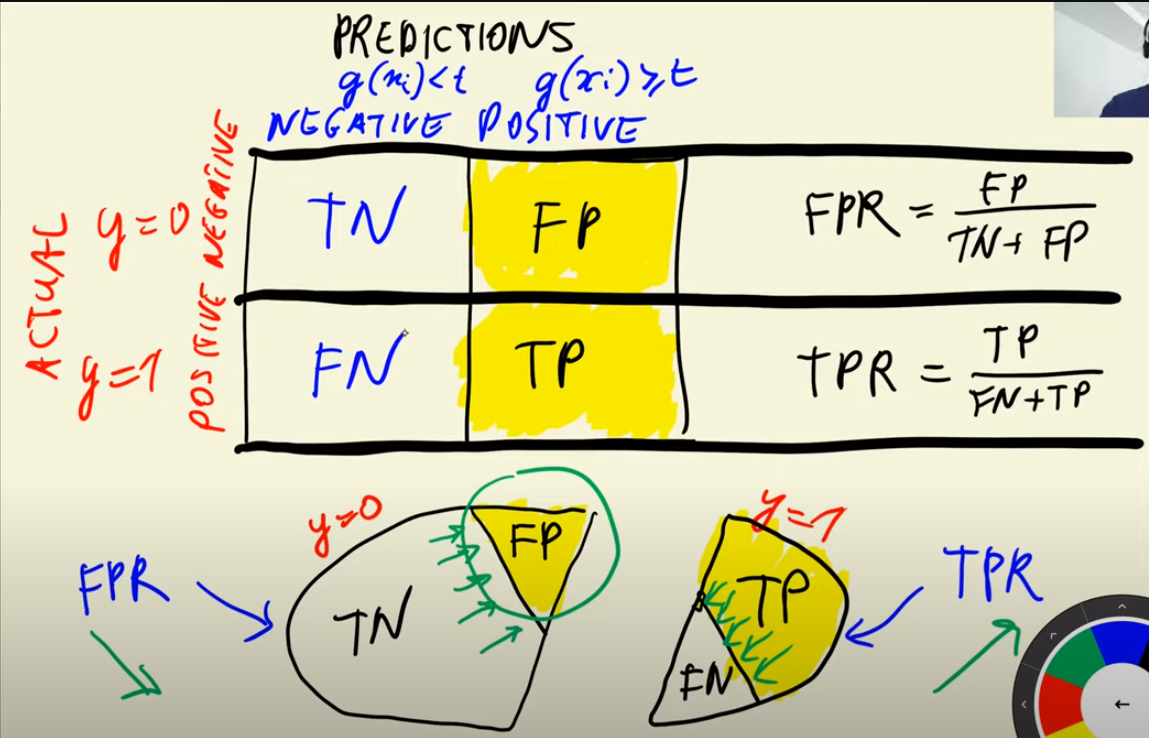

If we summarize the image above, we got the following table:

|Actual/Prediction   |Negative|Positive| FPR / TPR |
|---|:---:|:---:|:---:|
| Negative | True Negative | False Positive | fpr = fp / fp + tn
| Positive | False Negative | True Positive | tpr = tp / tp + fn

In [43]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [44]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

Now that we have these new indicators, lets calculate them with different thresholds

In [45]:
thresholds = np.linspace(0, 1, 101)

In [46]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (actual_positive & pred_positive).sum()
    tn = (actual_negative & pred_negative).sum()
    fp = (actual_negative & pred_positive).sum()
    fn = (actual_positive & pred_negative).sum()

    scores.append((t, tp, tn, fp, fn))


In [50]:
columns=['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)

In [51]:
df_scores.head()

,threshold,tp,tn,fp,fn
0,0.00,386,0,1023,0
1,0.01,385,110,913,1
2,0.02,384,193,830,2
3,0.03,383,257,766,3
4,0.04,381,308,715,5


In [53]:
df_scores['fpr'] = df_scores['fp']/(df_scores['fp'] + df_scores['tn'])
df_scores['tpr'] = df_scores['tp']/(df_scores['tp'] + df_scores['fn'])
df_scores.head()

,threshold,tp,tn,fp,fn,fpr,tpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,385,110,913,1,0.892473,0.997409
2,0.02,384,193,830,2,0.811339,0.994819
3,0.03,383,257,766,3,0.748778,0.992228
4,0.04,381,308,715,5,0.698925,0.987047


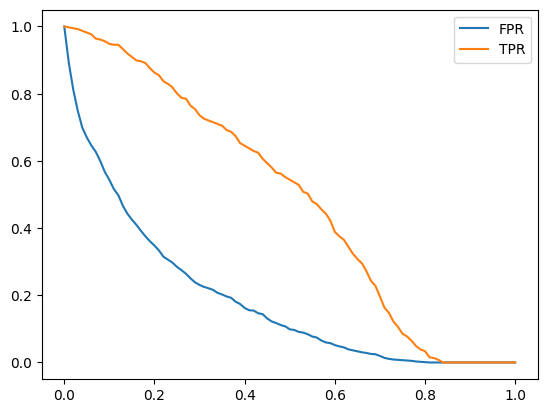

In [59]:
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.legend()

By looking at this chart we can have an idea of what happens to our model when we change the value of the threshold in terms of the FPR and TPR values.

The problem is that this chart alone doesn't give us a real indicator of how good is the performance of our model. We need to compare it with somethieng else. That is why we create a **Random Model**

### Random Model

In [62]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
len(y_val), len(y_rand)

(1409, 1409)

In [67]:
def fpr_tpr_dataframe(y_val, y_rand):
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        pred_positive = (y_rand >= t)
        pred_negative = (y_rand < t)

        tp = (actual_positive & pred_positive).sum()
        tn = (actual_negative & pred_negative).sum()
        fp = (actual_negative & pred_positive).sum()
        fn = (actual_positive & pred_negative).sum()

        scores.append((t, tp, tn, fp, fn))
    columns=['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['fpr'] = df_scores['fp']/(df_scores['fp'] + df_scores['tn'])
    df_scores['tpr'] = df_scores['tp']/(df_scores['tp'] + df_scores['fn'])
    return df_scores

In [68]:
df_rand_scores = fpr_tpr_dataframe(y_val, y_rand)

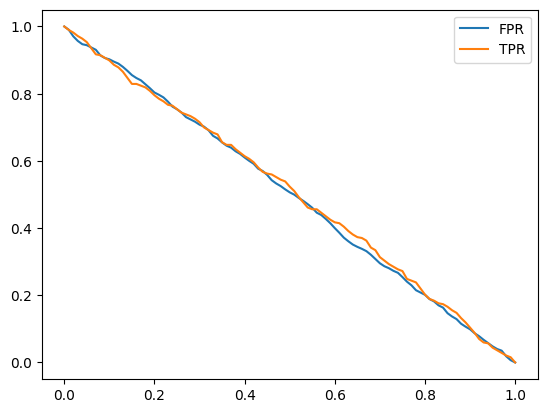

In [69]:
plt.plot(df_rand_scores['threshold'], df_rand_scores['fpr'], label='FPR')
plt.plot(df_rand_scores['threshold'], df_rand_scores['tpr'], label='TPR')
plt.legend()

In [72]:
df_rand_scores[::10]

,threshold,tp,tn,fp,fn,fpr,tpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.902248,0.898964
20,0.2,307,201,822,79,0.803519,0.795337
30,0.3,276,299,724,110,0.707722,0.715026
40,0.4,237,399,624,149,0.609971,0.613990
50,0.5,202,505,518,184,0.506354,0.523316
60,0.6,161,614,409,225,0.399804,0.417098
70,0.7,121,721,302,265,0.295210,0.313472
80,0.8,78,817,206,308,0.201369,0.202073
90,0.9,40,922,101,346,0.098729,0.103627


### Ideal Model

In [75]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

We create a new validation target considering the same proportion between 0s and 1s and call it y_ideal

In [77]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

Now lets create our predictions

In [79]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

Now lets get our dataframe

In [81]:
df_ideal_scores = fpr_tpr_dataframe(y_ideal, y_ideal_pred)

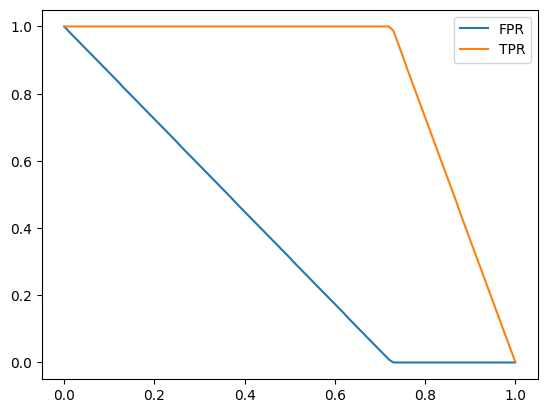

In [82]:
plt.plot(df_ideal_scores['threshold'], df_ideal_scores['fpr'], label='FPR')
plt.plot(df_ideal_scores['threshold'], df_ideal_scores['tpr'], label='TPR')
plt.legend()

We can see that actually around 0.72 threshold, would be the sweet spot in this case

In [84]:
1 - y_val.mean()

0.7260468417317246

In [86]:
((y_ideal_pred >= 0.7260) == y_ideal).mean()

1.0

Now we put everything together

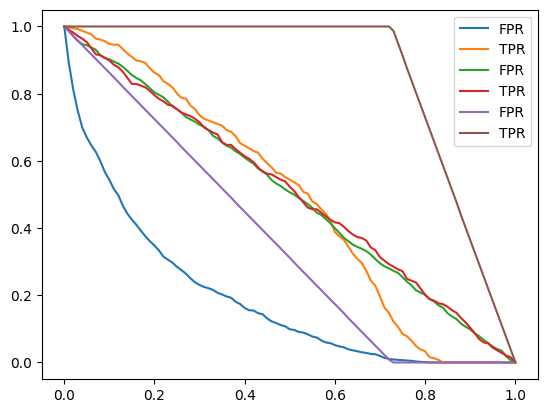

In [87]:
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')

plt.plot(df_rand_scores['threshold'], df_rand_scores['fpr'], label='FPR')
plt.plot(df_rand_scores['threshold'], df_rand_scores['tpr'], label='TPR')

plt.plot(df_ideal_scores['threshold'], df_ideal_scores['fpr'], label='FPR')
plt.plot(df_ideal_scores['threshold'], df_ideal_scores['tpr'], label='TPR')

plt.legend()

This chart combines the three previous charts where FPR and TPR are plotted against the threshold. Now lets try to make a chart where we plot FPR against TPR

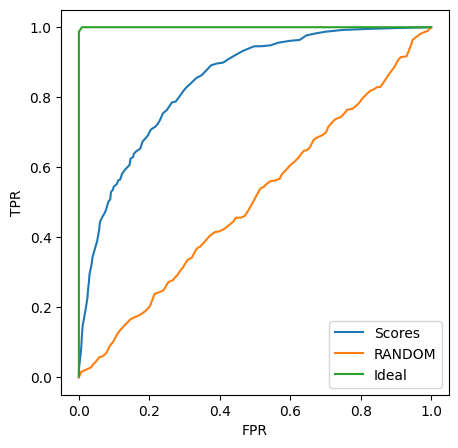

In [92]:
plt.figure(figsize=(5,5))
plt.plot(df_scores['fpr'], df_scores['tpr'], label='Scores')
plt.plot(df_rand_scores['fpr'], df_rand_scores['tpr'], label='RANDOM')
plt.plot(df_ideal_scores['fpr'], df_ideal_scores['tpr'], label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

The ideal point would be a **FPR=0 and TPR=1** (UPPER LEFT CORNER OF THE CHART)

So the closest the scores can be to this point, by adjusting the threshold, the better for the model. So the curve must be the closest possible to this point and the farther away as possible from the random curve

**Explanation**
- The closes points of the chart to the left, means that the threshold value is larger (closer to 1).
    - At the point (0,0) means that the threshold is 1, meaning 0 TPR since we predict that no one is churning and 0 FPR since as the model is predicting no one is churning, there wont be any mistakes either.
- The opposite to this point (1,1) means that we predict all users are churning, so all churning predictions will be positive. With that, we also have to asume that there are going to be a lot of mistakes since not all users will churn.
- All values in the middle will reflect the relation between FPR and TPR based on the threshold.

**ROC Curves with Scikit Learn**

There is a way to get the same ROC curves directly with scikit learn library

In [93]:
from sklearn.metrics import roc_curve

In [95]:
fpr, tpr, threshold = roc_curve(y_true=y_val,y_score=y_pred)

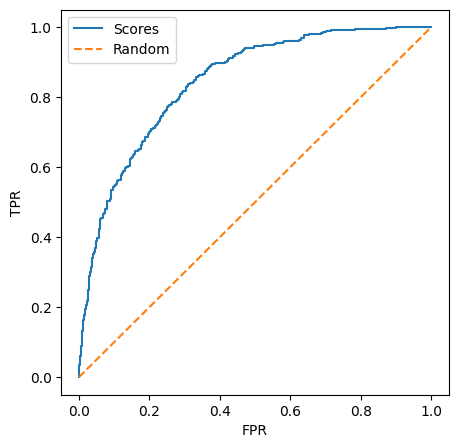

In [101]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Scores')
plt.plot([0, 1], [0, 1], label='Random', linestyle="--")

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()